# **Google Play Store Reviews**

**Problem Statement:**

The goal of this project is to build a Wine Classifier using K-Nearest Neighbors (KNN) to predict the quality of red wine based on its chemical properties. By analyzing features such as acidity, sugar, pH, and alcohol content, the model aims to classify wines into low, medium, or high quality. This can help identify sommelier-worthy wines using AI.

###  **Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

###  **Problem statement and data collection**

In [12]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")

total_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### **Exploration and data cleaning**

**Understanding the features**

1- Columns describe its chemical composition:

- fixed acidity, volatile acidity, citric acid
- residual sugar, chlorides
- free sulfur dioxide, total sulfur dioxide
- density, pH, sulphates, alcohol

2- Target column is quality:

- Determine the quality of the wine. 



In [13]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Dataset Overview:

- Shape: The dataset has 1599 rows (wines) and 12 columns (features + target).

- Features:

    There are 11 chemical composition features (e.g., acidity, sugar, alcohol).
    
    All features are numeric (float64), which is good because most ML models require numerical input.

- Target:

    The quality column is the label, stored as int64.

    It represents the wine’s quality on a scale (later we will map it to Low/Medium/High).

- Missing Values:

    The dataset has no missing values (all Non-Null Count = 1599), so no cleaning is required for nulls.

**Processing Data**

In [21]:
total_data["label"] = pd.cut(
    total_data["quality"], bins=[0, 4, 6, 10], labels=[0, 1, 2]
).astype(int)

In [16]:
total_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In this step, we created a new column called label, which will serve as our target variable. Although it is derived from the existing quality column, we need to restructure the values into three distinct categories:

0 → Low quality

1 → Medium quality

2 → High quality

By converting the raw quality scores into labels, we simplify the prediction task and make it more suitable for classification algorithms such as K-Nearest Neighbors.

**Split in train and test**

In [23]:
X = total_data.drop(["quality", "label"], axis=1)
y = total_data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [29]:
# Standardization with StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)


X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    index=X_train.index,
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index,
    columns=X_test.columns
)

X_train_scaled.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
354,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
342,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390


**Save the clean and raw data**

In [32]:
dataframes = {
    "X_train": X_train,
    "X_test": X_test,
    "X_train_scaled": X_train_scaled,
    "X_test_scaled": X_test_scaled,
    "y_train": y_train,
    "y_test": y_test,
    }

# Base path to save the files
save_path = "../data/processed/"

# Save the DataFrames in CSV
for name, df in dataframes.items():
    df.to_csv(f"{save_path}{name}.csv", index=False)

# Save the Scaler to pickle
with open("../models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

#### **KNN Model**

In [34]:
# Define dataset pairs 
dataset_pairs = {
    "X_train": (X_train, X_test),
    "X_train_scaled": (X_train_scaled, X_test_scaled)
}

results = {
    name: accuracy_score(
        y_test,
        KNeighborsClassifier(n_neighbors=5)
        .fit(X_train, y_train)
        .predict(X_test)
    )
    for name, (X_train, X_test) in dataset_pairs.items()
}

best_dataset = max(results, key=results.get)

print(f"Accuracy by dataset: {results}")
print(f"Best dataset: {best_dataset} with accuracy = {results[best_dataset]:.4f}")


Accuracy by dataset: {'X_train': 0.815625, 'X_train_scaled': 0.84375}
Best dataset: X_train_scaled with accuracy = 0.8438


In [35]:
X_train_final, X_test_final = dataset_pairs[best_dataset]

# Train the model with the best dataset
final_model = KNeighborsClassifier(n_neighbors=5)

final_model.fit(X_train_final, y_train)

# Evaluate the model
y_pred_final = final_model.predict(X_test_final)

print("Inicial Accuracy:", accuracy_score(y_test, y_pred_final))

Inicial Accuracy: 0.84375


**Evaluation and Predictions**

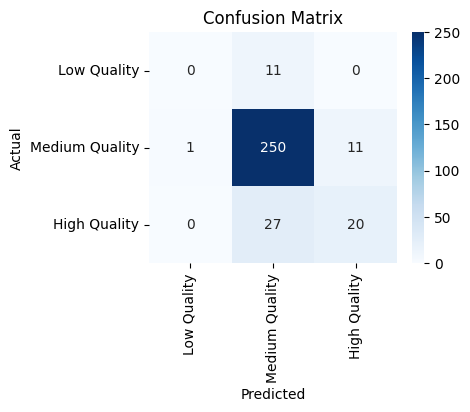

Accuracy: 84.38%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.95      0.91       262
           2       0.65      0.43      0.51        47

    accuracy                           0.84       320
   macro avg       0.50      0.46      0.47       320
weighted avg       0.81      0.84      0.82       320



In [50]:
y_pred_test = final_model.predict(X_test_final)

# Accuracy y classification report
test_accuracy = accuracy_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_final)

classes = ["Low Quality", "Medium Quality", "High Quality"]

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

classification_rep = classification_report(y_test, y_pred_final)

print(f"Accuracy: {test_accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_rep)


The KNN model achieved an overall accuracy of 84.38% on the test set. It performs very well in predicting the medium-quality wines, which are the majority class, but struggles with the low- and high-quality wines, likely due to class imbalance. While the overall performance is strong, improvements could be made for the minority classes to enhance the model’s robustness across all wine quality levels.

**Optimize k.**

In [66]:
k_results = {k: accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)) 
             for k in range(1, 11)}

best_k = max(k_results, key=k_results.get)
print(f"Best k: {best_k} with accuracy = {k_results[best_k]:.4f}")


Best k: 4 with accuracy = 0.8219


In [63]:
# Train the model with the best n_neighbors
best_model = KNeighborsClassifier(n_neighbors=4)

best_model.fit(X_train_final, y_train)

# Evaluate the model
y_pred_final = best_model.predict(X_test_final)

print("Final Accuracy with the best n_neighbors:", accuracy_score(y_test, y_pred_final))

Final Accuracy with the best n_neighbors: 0.85


**Save the model**

In [64]:
# Save the trained model
with open("../models/KNN_model.sav", "wb") as f:
    pickle.dump(best_model, f)